# ① Import modules

In [1]:
import os
import pandas as pd
import numpy as np
import itertools
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV, train_test_split

# ② Set condition to make experimental candidate points

In [2]:
# set condition list
mix1 = [5.0]
mix2 = [3.4]
mix3 = [5.0]
mix4 = [4.4]
mix5 = [3.0]
Tyrosine = [4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0]
Proline = [2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0]
Cysteine = [4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0]
Serine = [2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0]
Glutamic_Acid = [2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0]
Glutamine = [3.0, 3.5, 4.0, 4.5, 5.0, 5.5, 6.0, 6.5, 7.0, 7.5, 8.0]

cond = [mix1, mix2, mix3, mix4, mix5, Tyrosine, Proline, Cysteine, Serine, Glutamic_Acid, Glutamine]

# ③ Conditions of machine learning

In [3]:
# lock value for train/test split and machine learning
random_state = 55555555      # 55555555                                  # change three or more times for evaluate of machine learning valiance

param_grid_gbdt = {"learning_rate":[i/1000 for i in range(1,502,5)],     # learning rate
                   "max_depth":[2,3,4,5],                                # depth of estimators
                   "n_estimators":[300] ,                                # number of estimators
                   "random_state":[random_state]}                        # random state     

gbdt=GridSearchCV(GradientBoostingRegressor(),param_grid_gbdt,cv=5)

# ④ Import data

In [5]:
data=pd.read_excel("Rounds2-5_data.xlsx", sheet_name=0)   #Select regular or time-saving
data

,No.,ExNo.,IgG_product,mix1,mix2,mix3,mix4,mix5,L-Tyrosine disodium salt dihydrate,L-Proline,L-Cysteine hydrochloride-H2O,L-Serine,L-Glutamic Acid,L-Glutamine
0,1,1,0.860108,0.25,0.25,0.250,0.250,4.000,0.25,0.250,0.250,0.250,0.250,4.000
1,2,2,0.770758,0.25,0.25,0.250,2.125,2.125,0.25,2.125,2.125,2.125,0.250,2.125
2,3,3,0.505415,0.25,0.25,0.250,4.000,0.250,0.25,4.000,4.000,4.000,0.250,0.250
3,4,4,0.807762,0.25,0.25,2.125,0.250,2.125,0.25,0.250,0.250,0.250,2.125,2.125
4,5,5,0.601083,0.25,0.25,2.125,2.125,0.250,0.25,2.125,2.125,2.125,2.125,0.250
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
111,112,41,1.038198,5.00,3.40,5.000,4.400,3.000,10.00,10.000,10.000,10.000,2.000,1.000
112,113,42,1.003918,5.00,4.40,5.000,4.400,3.000,5.00,4.400,4.400,4.400,5.000,3.000
113,114,43,0.646123,5.00,4.40,5.000,5.000,3.000,5.00,5.000,5.000,5.000,5.000,3.000
114,115,44,0.696376,5.00,4.40,5.000,3.800,1.000,5.00,3.800,3.800,3.800,5.000,1.000


In [6]:
# split date and display train data
train, test = train_test_split(data, test_size=0.25, random_state=random_state)
train

,No.,ExNo.,IgG_product,mix1,mix2,mix3,mix4,mix5,L-Tyrosine disodium salt dihydrate,L-Proline,L-Cysteine hydrochloride-H2O,L-Serine,L-Glutamic Acid,L-Glutamine
47,48,24,1.000000,1.00,1.00,1.000,1.000,1.000,1.00,1.000,1.000,1.000,1.000,1.000
76,77,6,1.127273,5.00,3.40,5.000,4.400,3.000,2.00,2.000,10.000,10.000,2.000,1.000
95,96,25,0.969638,5.00,3.40,5.000,4.400,3.000,6.00,10.000,2.000,2.000,6.000,4.500
36,37,13,0.884906,2.25,4.00,2.250,0.500,3.250,2.25,0.500,0.500,0.500,2.250,3.250
14,15,15,0.457581,4.00,0.25,0.250,0.250,0.250,4.00,0.250,0.250,0.250,0.250,0.250
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
97,98,27,0.969638,5.00,3.40,5.000,4.400,3.000,6.00,10.000,6.000,6.000,2.000,8.000
2,3,3,0.505415,0.25,0.25,0.250,4.000,0.250,0.25,4.000,4.000,4.000,0.250,0.250
3,4,4,0.807762,0.25,0.25,2.125,0.250,2.125,0.25,0.250,0.250,0.250,2.125,2.125
40,41,17,1.083962,4.00,2.25,2.250,4.000,6.000,4.00,4.000,4.000,4.000,2.250,6.000


In [7]:
# display test data
test

,No.,ExNo.,IgG_product,mix1,mix2,mix3,mix4,mix5,L-Tyrosine disodium salt dihydrate,L-Proline,L-Cysteine hydrochloride-H2O,L-Serine,L-Glutamic Acid,L-Glutamine
79,80,9,1.254545,5.000,3.400,5.00,4.400,3.00,2.000,6.000,10.000,2.000,10.00,4.50
49,50,2,1.058312,3.000,3.000,1.20,3.000,1.50,3.000,3.000,3.000,3.000,1.20,1.50
58,59,11,1.392515,5.000,4.800,4.00,4.000,2.60,5.000,4.000,4.000,4.000,4.00,2.60
106,107,36,1.065526,5.000,3.400,5.00,4.400,3.00,10.000,6.000,6.000,6.000,6.00,4.50
82,83,12,1.046465,5.000,3.400,5.00,4.400,3.00,2.000,10.000,6.000,6.000,10.00,1.00
37,38,14,0.712264,4.000,0.500,0.50,0.500,3.25,4.000,0.500,0.500,0.500,0.50,3.25
81,82,11,0.755556,5.000,3.400,5.00,4.400,3.00,2.000,10.000,2.000,10.000,2.00,4.50
0,1,1,0.860108,0.250,0.250,0.25,0.250,4.00,0.250,0.250,0.250,0.250,0.25,4.00
74,75,4,1.070707,5.000,3.400,5.00,4.400,3.00,2.000,2.000,10.000,2.000,2.00,8.00
7,8,8,0.689531,0.250,2.125,0.25,2.125,0.25,0.250,2.125,2.125,2.125,0.25,0.25


# ⑤ Set range of explanatory variables ( column name )

In [8]:
features=data.columns[3:]
features

Index(['mix1', 'mix2', 'mix3', 'mix4', 'mix5',
       'L-Tyrosine disodium salt dihydrate', 'L-Proline',
       'L-Cysteine hydrochloride-H2O', 'L-Serine', 'L-Glutamic Acid',
       'L-Glutamine'],
      dtype='object')

# ⑥ Execute machine larning (GBDT)

In [9]:
gbdt.fit(train[features],train["IgG_product"])

GridSearchCV(cv=5, estimator=GradientBoostingRegressor(),
             param_grid={'learning_rate': [0.001, 0.006, 0.011, 0.016, 0.021,
                                           0.026, 0.031, 0.036, 0.041, 0.046,
                                           0.051, 0.056, 0.061, 0.066, 0.071,
                                           0.076, 0.081, 0.086, 0.091, 0.096,
                                           0.101, 0.106, 0.111, 0.116, 0.121,
                                           0.126, 0.131, 0.136, 0.141, 0.146, ...],
                         'max_depth': [2, 3, 4, 5], 'n_estimators': [300],
                         'random_state': [55555555]})

In [10]:
best_params = gbdt.best_params_
best_params

{'learning_rate': 0.291,
 'max_depth': 3,
 'n_estimators': 300,
 'random_state': 55555555}

In [9]:
# save model
save_model_name = r"GBR_model_in_forth_cycle.pickle"      

import pickle

pickle.dump(gbdt, open(save_model_name,'wb'))
# Check if it's saved
model = pickle.load(open(save_model_name,'rb'))
model

GridSearchCV(cv=5, estimator=GradientBoostingRegressor(),
             param_grid={'learning_rate': [0.001, 0.006, 0.011, 0.016, 0.021,
                                           0.026, 0.031, 0.036, 0.041, 0.046,
                                           0.051, 0.056, 0.061, 0.066, 0.071,
                                           0.076, 0.081, 0.086, 0.091, 0.096,
                                           0.101, 0.106, 0.111, 0.116, 0.121,
                                           0.126, 0.131, 0.136, 0.141, 0.146, ...],
                         'max_depth': [2, 3, 4, 5], 'n_estimators': [300],
                         'random_state': [55555555]})

In [10]:
# output predict/measured data
pred_train = pd.concat([train[["No.","IgG_product"]], pd.Series(gbdt.predict(train[features]), name = "pred", index=train.index)], axis=1).sort_index(ascending=True)
pred_train["category"] = "train"
pred_test = pd.concat([test[["No.","IgG_product"]], pd.Series(gbdt.predict(test[features]), name = "pred", index=test.index)], axis=1).sort_index(ascending=True)
pred_test["category"] = "test"
pred_all = pd.concat([pred_train, pred_test], axis=0).sort_index(ascending=True)
#pred_all.to_clipboard()
pred_all

,No.,IgG_product,pred,category
0,1,0.860108,0.705957,test
1,2,0.770758,0.770755,train
2,3,0.505415,0.505420,train
3,4,0.807762,0.807784,train
4,5,0.601083,0.601057,train
...,...,...,...,...
111,112,1.038198,1.074374,test
112,113,1.003918,1.003950,train
113,114,0.646123,0.646117,train
114,115,0.696376,0.696382,train


In [11]:
# evaluation of machine learning model

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score  

# calculate R2, R
train_r2     = r2_score(pred_train["IgG_product"], pred_train["pred"])
train_r      = np.corrcoef(pred_train["IgG_product"], pred_train["pred"])[0,1]
test_r2     = r2_score(pred_test["IgG_product"], pred_test["pred"])
test_r      = np.corrcoef(pred_test["IgG_product"], pred_test["pred"])[0,1]


print('R2 and R\n')
print('train  \t\tR2, R = ', f'{train_r2:.3f}',"\t",f'{train_r:.3f}')
print('test  \t\tR2, R = ', f'{test_r2:.3f}',"\t",f'{test_r:.3f}')
print('\n')

# calculate MAE
MAE_train = mean_absolute_error(pred_train["IgG_product"], pred_train["pred"])
MAE_test = mean_absolute_error(pred_test["IgG_product"], pred_test["pred"])
print(f'pridict / measured MAE\n')

print(f'MAE train  =','\t ',f'{MAE_train:.3f}')
print(f'MAE test  =','\t ',f'{MAE_test:.3f}')

R2 and R

train  		R2, R =  1.000 	 1.000
test  		R2, R =  0.624 	 0.819


pridict / measured MAE

MAE train  = 	  0.000
MAE test  = 	  0.139


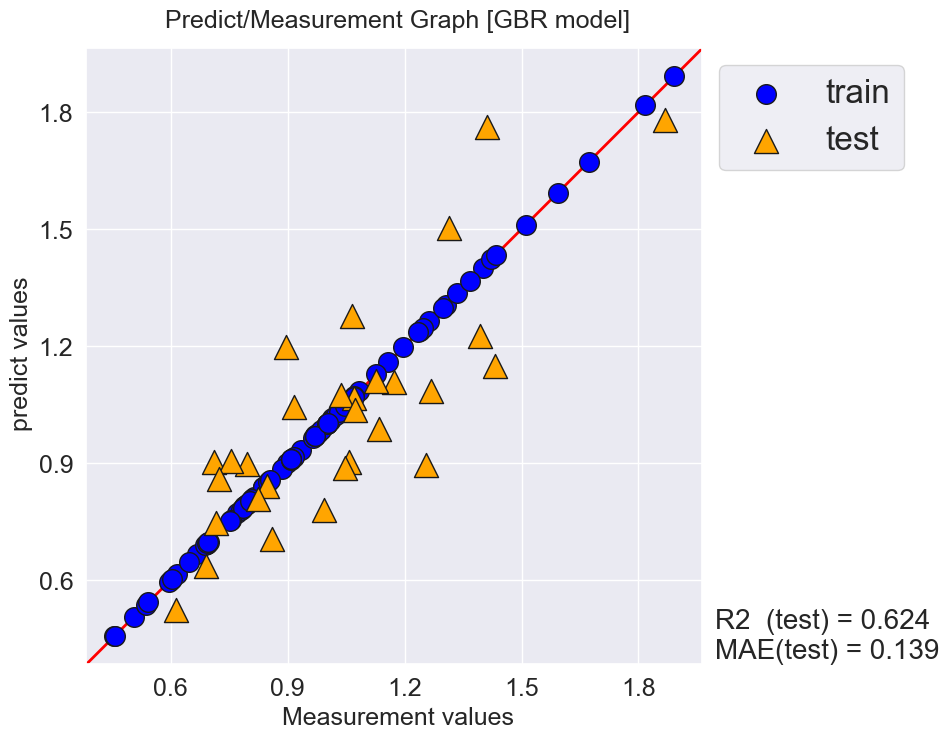

In [12]:
# make predict/measure plot

# import modules
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
from pylab import rcParams
import seaborn as sns; sns.set()            
#plt.rcParams['font.family'] = 'Yu Gothic'   

# set max and min values 
lower =  np.nanmin(np.concatenate([pred_train["IgG_product"].values,  pred_test["pred"].values]))
upper =  np.nanmax(np.concatenate([pred_train["IgG_product"].values,  pred_test["pred"].values]))
center = 0.5*(lower+upper) ; length = 0.5*(upper-lower)
lower = center - 1.1*length ; upper = center + 1.1*length
glist = [lower,upper]

# set condtions of graph
fig = plt.figure(figsize=(8,8))                          
ax = fig.add_subplot(1 ,1, 1)                              
plt.rcParams['font.size'] = 18                                       
plt.xlim(glist) ; plt.ylim(glist)                                
# set axis
plt.title(f' Predict/Measurement Graph [GBR model]',       
          fontsize=18, pad = 15)                                
plt.xlabel(f' Measurement values',fontsize=18)                 
plt.ylabel(f' predict values',fontsize=18)                    
plt.tick_params(labelsize=18)                                          
ax.xaxis.set_major_locator(mpl.ticker.MaxNLocator(6))                   
ax.yaxis.set_major_locator(mpl.ticker.MaxNLocator(6))                  

# plot train data
plt.scatter(pred_train["IgG_product"], pred_train["pred"], label='train', color ='blue', ec='k', s=200, marker='o', zorder =2)
# plot test data
plt.scatter(pred_test["IgG_product"], pred_test["pred"],   color ='orange', ec='k', s=300, marker='^', label='test', zorder =3)
# plot diagonal
x1 = np.linspace(lower, upper) ; y1 = x1              
plt.plot(x1,y1,color='red',linewidth=2, zorder =1)    

# set legend
plt.legend(bbox_to_anchor=(1, 1), loc='upper left',fontsize=24)
# set evaluation value
ax.text(1.02, 0, f'R2  (test) = {(test_r2):.3f}\nMAE(test) = {(MAE_test):.3f}',
        fontsize=20, va='bottom', transform=ax.transAxes, rotation=0)
ax.set_aspect('equal', adjustable='box')
#ax.axis([upper,lower,upper,lower])
plt.show()

# ⑦ Creation of experimental candidate points

In [13]:
artificial_data=list(itertools.product(mix1, mix2, mix3, mix4, mix5, Tyrosine, Proline, Cysteine, Serine, Glutamic_Acid, Glutamine))
artificial_data=pd.DataFrame(artificial_data, columns=["mix1", "mix2", "mix3", "mix4", "mix5",
                                                       "L-Tyrosine disodium salt dihydrate",
                                                       "L-Proline",
                                                       "L-Cysteine hydrochloride-H2O",
                                                       "L-Serine",
                                                       "L-Glutamic Acid",
                                                       "L-Glutamine",
                                                      ])
#artificial_data.to_clipboard()
artificial_data

,mix1,mix2,mix3,mix4,mix5,L-Tyrosine disodium salt dihydrate,L-Proline,L-Cysteine hydrochloride-H2O,L-Serine,L-Glutamic Acid,L-Glutamine
0,5.0,3.4,5.0,4.4,3.0,4.0,2.0,4.0,2.0,2.0,3.0
1,5.0,3.4,5.0,4.4,3.0,4.0,2.0,4.0,2.0,2.0,3.5
2,5.0,3.4,5.0,4.4,3.0,4.0,2.0,4.0,2.0,2.0,4.0
3,5.0,3.4,5.0,4.4,3.0,4.0,2.0,4.0,2.0,2.0,4.5
4,5.0,3.4,5.0,4.4,3.0,4.0,2.0,4.0,2.0,2.0,5.0
...,...,...,...,...,...,...,...,...,...,...,...
392926,5.0,3.4,5.0,4.4,3.0,10.0,10.0,10.0,10.0,10.0,6.0
392927,5.0,3.4,5.0,4.4,3.0,10.0,10.0,10.0,10.0,10.0,6.5
392928,5.0,3.4,5.0,4.4,3.0,10.0,10.0,10.0,10.0,10.0,7.0
392929,5.0,3.4,5.0,4.4,3.0,10.0,10.0,10.0,10.0,10.0,7.5


# ⑧ Predict experimental candidate points

In [14]:
artificial_data["predicted"]=gbdt.predict(artificial_data)

In [15]:
# pick-up top 1000 sumples
sort=artificial_data.sort_values("predicted", ascending=False)
results=sort[0:1001].copy()
#results.to_clipboard()

# ⑨ Output experimental candidate points

In [16]:
results.to_csv("predicted_by_GBR_4th_cycle.csv")